In [6]:
import keras
import sys
import matplotlib
import numpy as np
import time
import matplotlib.pyplot as plt
import os

sys.path.append('../')

from datasets import CD_Dataset
from models import Unet, MimoNet
from utility import show_batches, from_categorical, train, crop_receptive, predict_full_image
from utility import dice, precision, Pc
from datasets import combine_y_w


In [7]:
input_patch_size = [450,450] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [2] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 300 # epochs
REG = True # regularization
USEW = True # use weights
W = 10 # importance of weights
NAME_NET = 'Unet_W100' # name for saving
JT = True # Just train set means no evaluation during training 

trained_models_path = './trained_models'
NAME_NET = os.path.join(trained_models_path,NAME_NET)

In [8]:
# Load the dataset
dataset_path = '../CD_Dataset'
dataset = CD_Dataset( path=dataset_path, 
                     train_y_path="train_y",  
                     eval_y_path="eval_y", 
                     fit=True, 
                     download=True, 
                     num_classes=output_channels[0] )


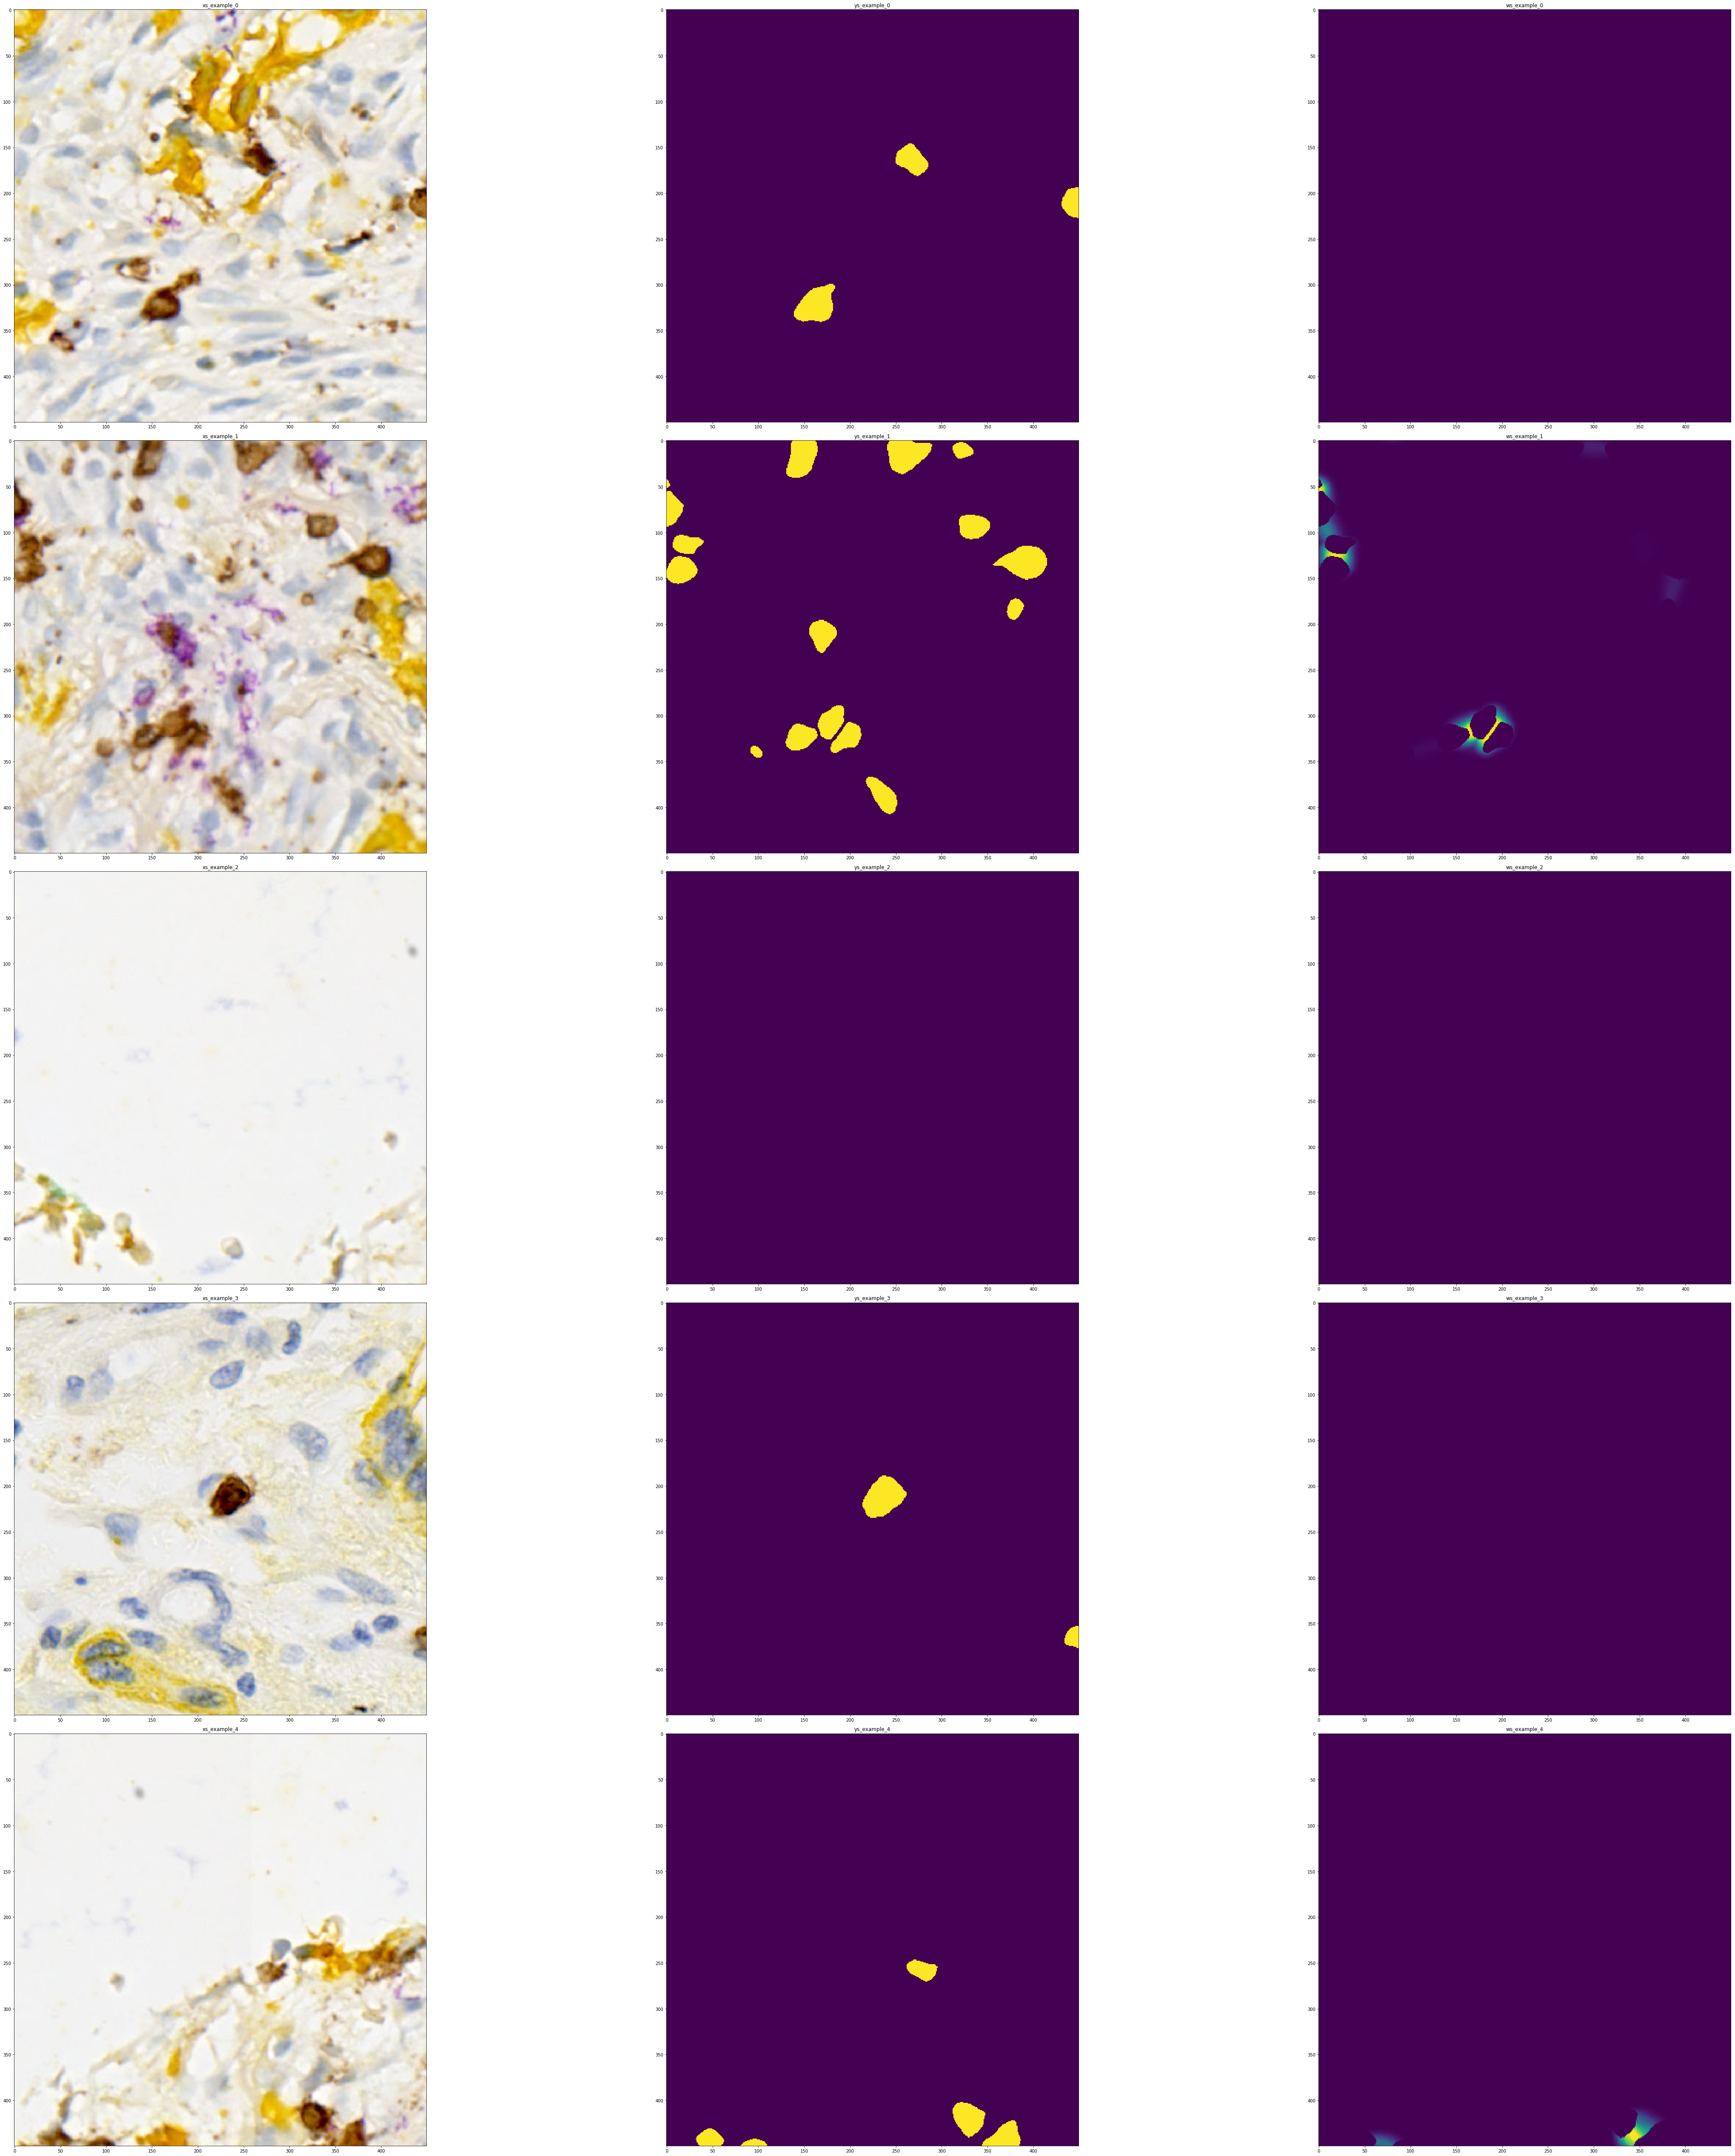

In [9]:
# Visualize some data
means = dataset.mean_features()
stds = dataset.std_features()
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5,fit=False, rotate=False)
ys_imgs = from_categorical(ys)
show_batches([xs,ys_imgs,ws],["xs","ys","ws"])